In [1]:
import cospar as cs
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [2]:
#sc.settings.set_figure_params(dpi=100, facecolor='white')
cs.settings.set_figure_params()

In [3]:
adata = sc.read('/home/chang/data_dir/data.h5ad')
adata

AnnData object with n_obs × n_vars = 2944 × 60959
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'clone', 'percent.mt', 'condition', 'RNA_snn_res.1', 'seurat_clusters', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'integrated_snn_res.8', 'integrated_snn_res.11', 'integrated_snn_res.15', 'integrated_snn_res.4', 'integrated_snn_res.1', 'integrated_snn_res.2', 'integrated_snn_res.3', 'integrated_snn_res.20', 'integrated_snn_res.6', 'cell_type', 'lineage', 'integrated_snn_res.10', 'integrated_snn_res.12', 'sample', 'SCT_snn_res.0.8', 'SCT_snn_res.0.3', 'SCT_snn_res.0.2', 'SCT_snn_res.0.1', 'clusters', 'nCount_integrated', 'nFeature_integrated'
    obsm: 'X_pca', 'X_umap'

In [4]:
cs.pp.get_X_clone(adata,adata.obs.index.tolist(),adata.obs.clone.tolist())
adata.obs['state_info'] = adata.obs['clusters']
adata.uns["data_des"] = "/home/chang/data_dir/cospar"
adata.obs["time_info"] = 0

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2944/2944 [00:00<00:00, 1620901.94it/s]


In [8]:
cycling_gene_list=['Ube2c', 'Hmgb2', 'Hmgn2', 'Tuba1b', 'Ccnb1', 'Tubb5', 'Top2a', 'Tubb4b']
cycling_gene_list = [x.upper() for x in cycling_gene_list]
cycling_gene_list

['UBE2C', 'HMGB2', 'HMGN2', 'TUBA1B', 'CCNB1', 'TUBB5', 'TOP2A', 'TUBB4B']

In [9]:
#cs.pp.get_highly_variable_genes(adata)
#cs.pp.remove_cell_cycle_correlated_genes(adata,cycling_gene_list)
#cs.pp.get_X_pca(adata)
#cs.pp.get_X_emb(adata)

In [10]:
adata.obsm['X_emb'] = adata.obsm['X_umap']

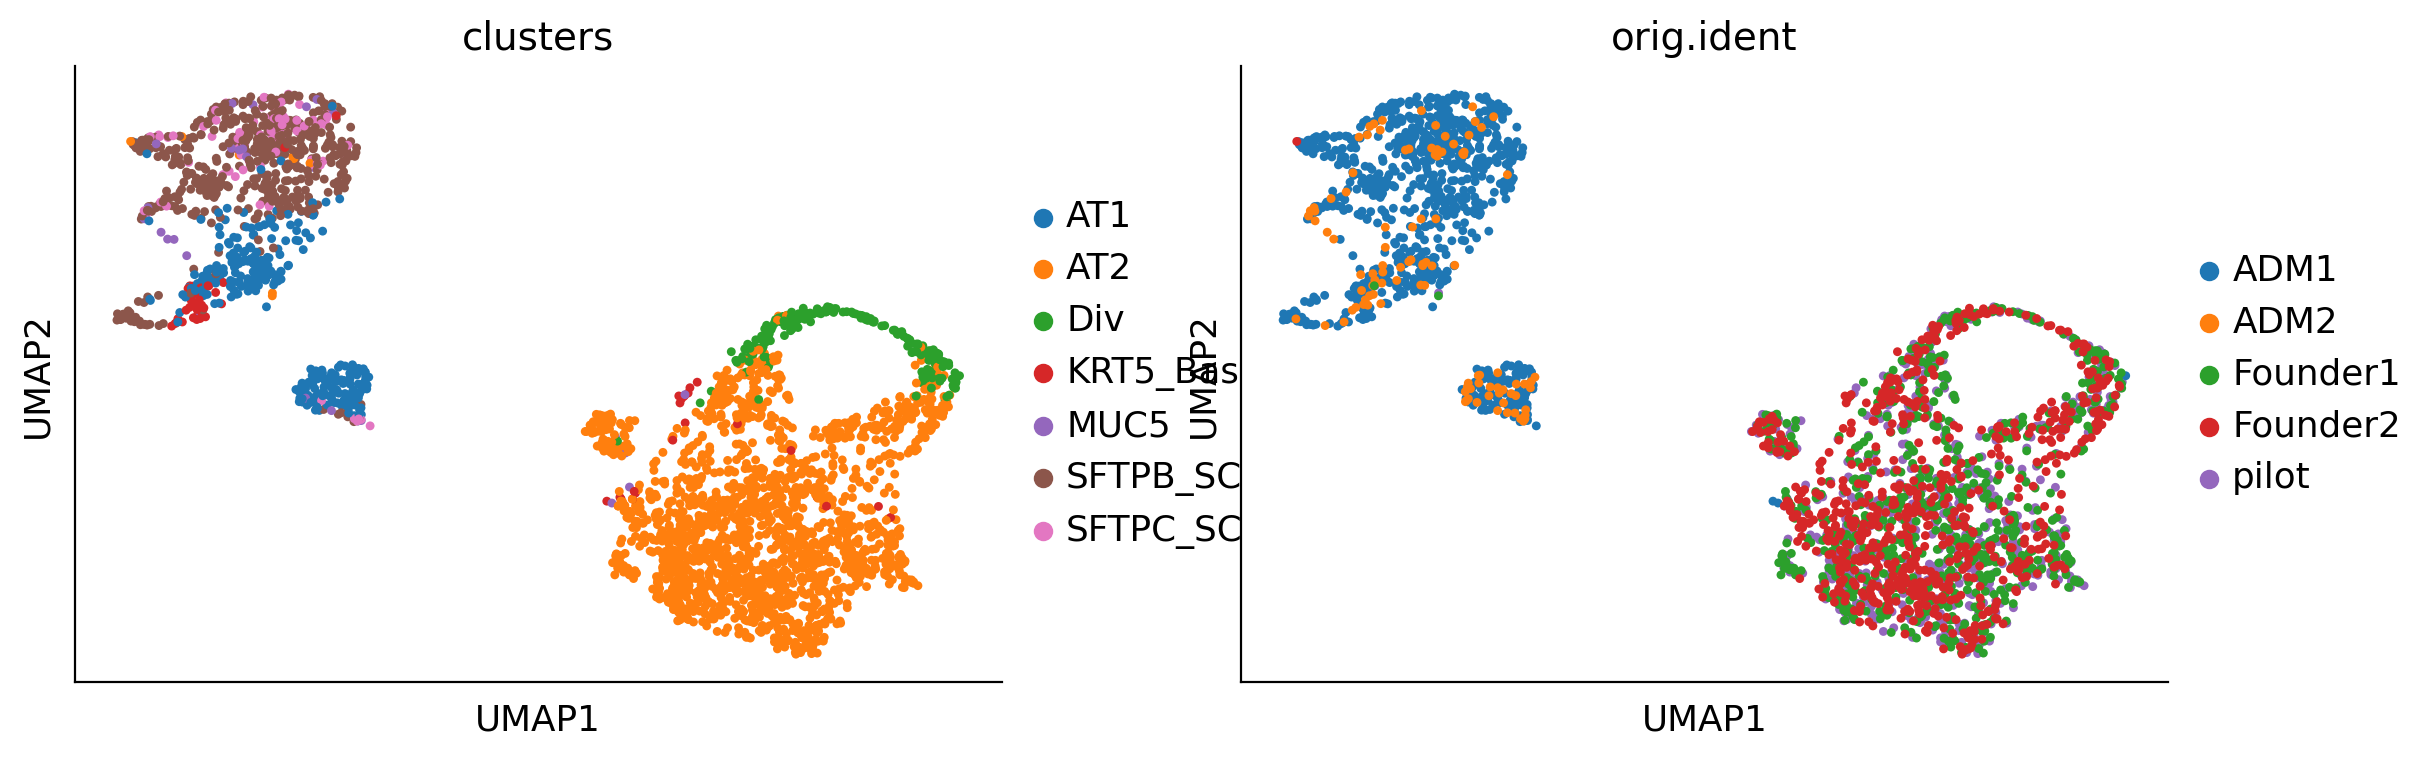

In [12]:
sc.pl.umap(adata,  color=['clusters', 'orig.ident'])

Data saved at adata.uns['barcode_heatmap']


FileNotFoundError: [Errno 2] No such file or directory: 'figure/r_clonal_barcode_heatmap.pdf'

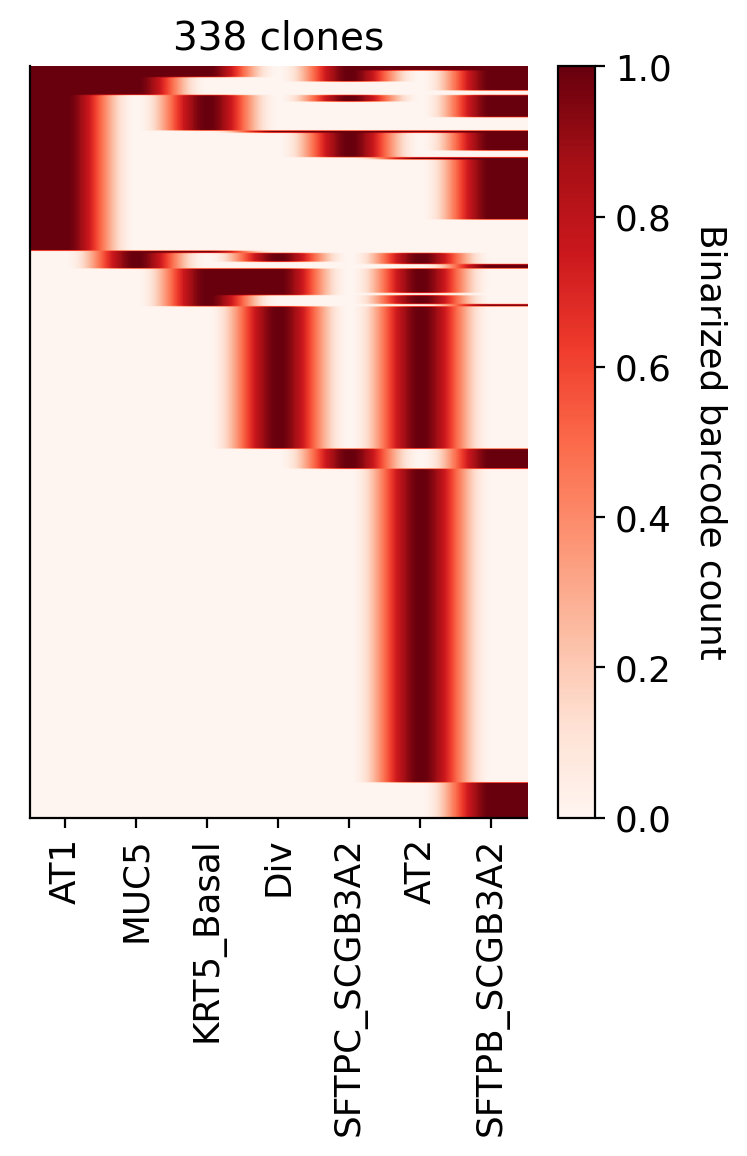

In [14]:
cs.pl.barcode_heatmap(adata,selected_times=None,
        color_bar=True,log_transform=False,binarize=True)

normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


FileNotFoundError: [Errno 2] No such file or directory: 'figure/r_fate_coupling_X_clone.pdf'

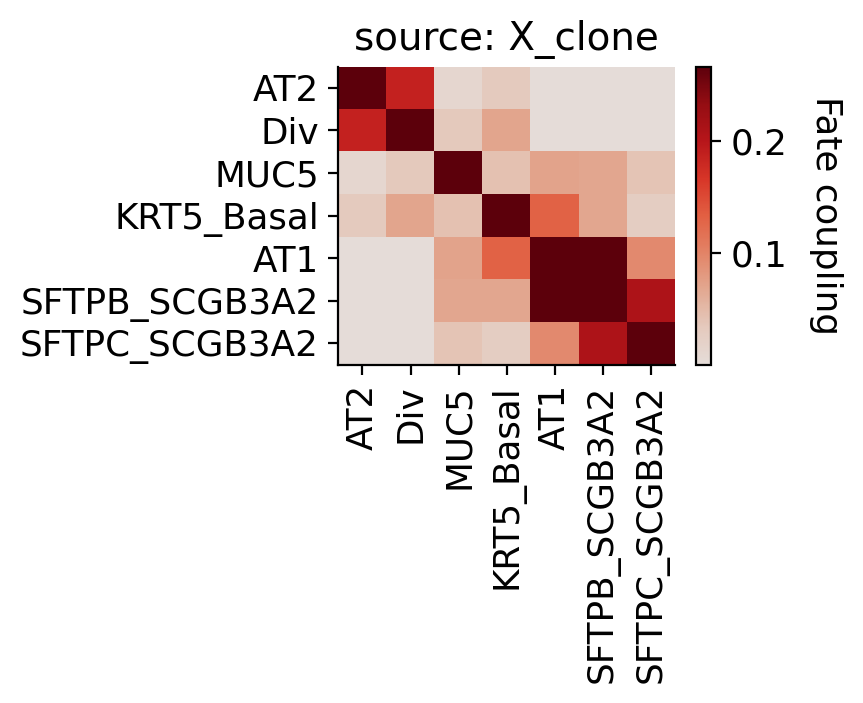

In [5]:
cs.tl.fate_coupling(adata,source='X_clone') # compute the fate coupling
cs.pl.fate_coupling(adata,source='X_clone') # actually plot the coupling

In [7]:
cs.tl.fate_hierarchy(adata,source='X_clone') # compute the fate hierarchy
cs.pl.fate_hierarchy(adata,source='X_clone') # actually plot the hierarchy

normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
normalize by X_clone
each selected cluster has a unique time point. Normalize per time point
Results saved as dictionary at adata.uns['fate_hierarchy_X_clone']

               /-AT1
            /-|
         /-|   \-SFTPB_SCGB3A2
        |  |
      /-|   \-SFTPC_SCGB3A2
     |  |
   /-|   \-KRT5_Basal
  |  |
--|   \-MUC5
  |
  |   /-AT2
   \-|
      \-Div


In [8]:
my_tree_refined = adata.uns["fate_hierarchy_X_clone"]["tree"]
my_tree_refined

Tree node '' (0x7f4d122dc64)

In [9]:
cs.settings.figure_path

'figure'

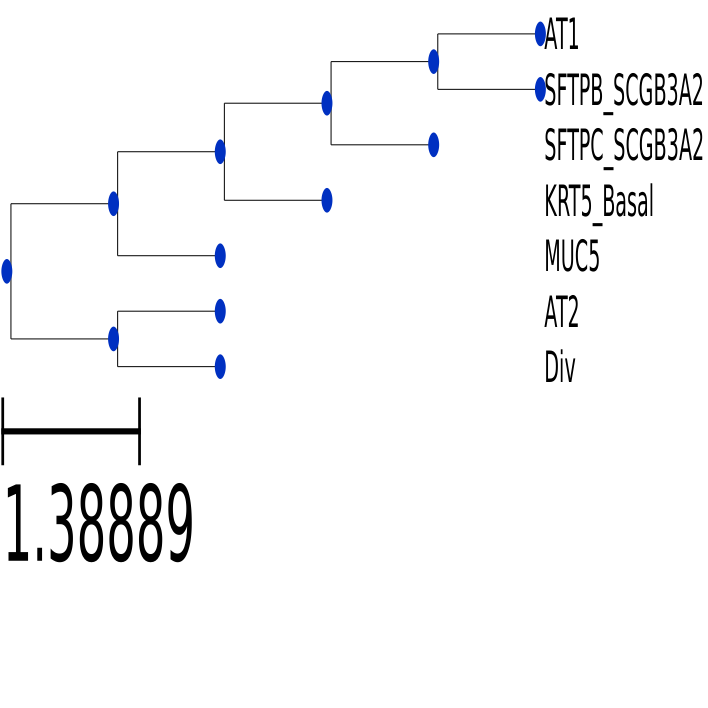

In [12]:
cs.pl.visualize_tree(
    my_tree_refined,
    color_coding=None,
    mode="r",
    data_des=f"my_tree",
    figure_path="/home/chang/data_dir/cospar",
    dpi=300
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 598.43it/s]


Data saved at adata.uns['clonal_fate_bias']


FileNotFoundError: [Errno 2] No such file or directory: 'figure/r_clonal_fate_bias.pdf'

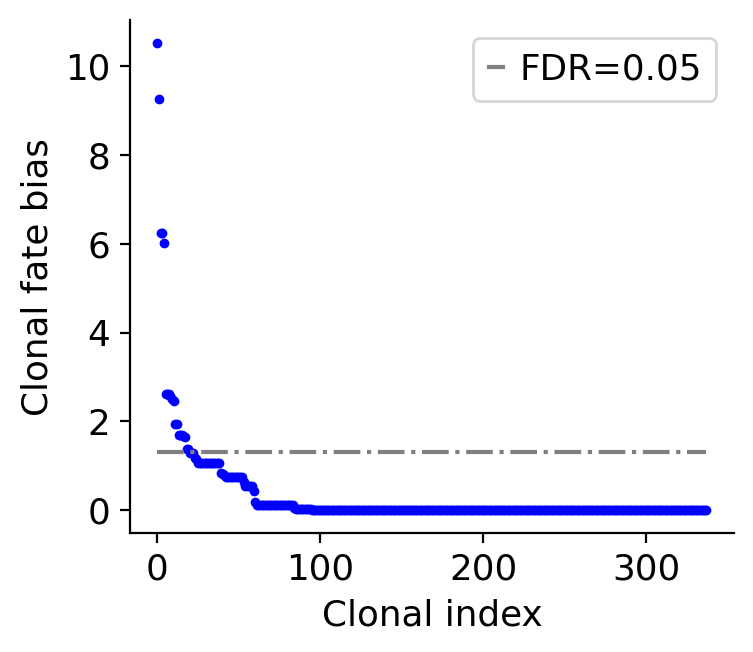

In [68]:
cs.tl.clonal_fate_bias(adata,selected_fate='AT1',alternative='two-sided') # compute the fate hierarchy
cs.pl.clonal_fate_bias(adata) # actually plot the hierarchy

In [70]:
result=adata.uns['clonal_fate_bias']
result

,Clone_ID,Clone_size,Q_value,Fate_bias,clonal_fraction_in_target_fate
0,167,78,3.029219e-11,10.518669,0.410256
1,289,17,5.388161e-10,9.268559,0.823529
2,321,28,5.823002e-07,6.234853,0.535714
3,19,15,5.823002e-07,6.234853,0.733333
4,333,99,9.783481e-07,6.009507,0.292929
...,...,...,...,...,...
333,121,4,1.000000e+00,-0.000000,0.000000
334,120,14,1.000000e+00,-0.000000,0.000000
335,119,3,1.000000e+00,-0.000000,0.000000
336,126,4,1.000000e+00,-0.000000,0.000000


FileNotFoundError: [Errno 2] No such file or directory: 'figure/r_different_clones_167.pdf'

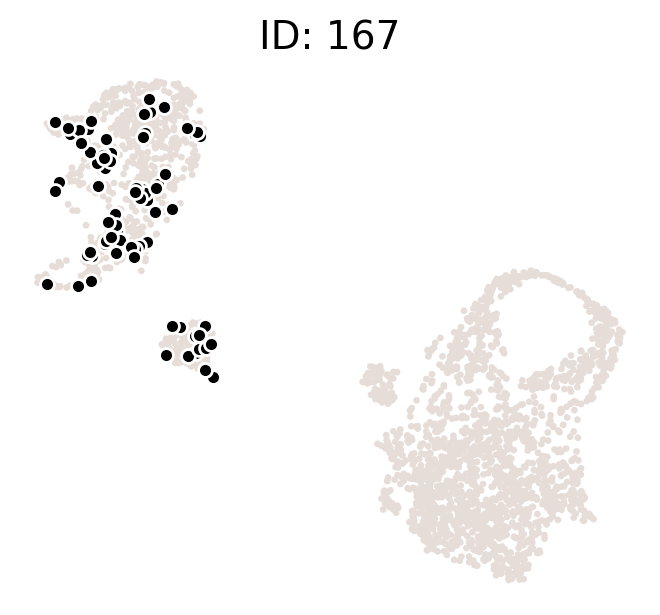

In [71]:
ids=result['Clone_ID'][0:]
cs.pl.clones_on_manifold(adata,selected_clone_list=ids,color_list=['black','red','blue'],clone_markersize=10,)

In [74]:
gw15_rep1=cs.tmap.infer_Tmap_from_clonal_info_alone(gw15_rep1,method='weinreb',later_time_point='6',selected_fates=selected_fates)

NameError: name 'gw15_rep1' is not defined

In [ ]:
cs.tl.fate_coupling(adata,selected_fates=selected_fates,source='transition_map')
cs.pl.fate_coupling(adata,source='transition_map')

In [ ]:
cs.tl.fate_hierarchy(adata,selected_fates=selected_fates,source='transition_map')
cs.pl.fate_hierarchy(adata,source='transition_map')